In [13]:
import sys
from copy import deepcopy
from os import getcwd
from os.path import dirname, join

import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rxr
from numpy import fft

SRC_DIR = join(dirname(getcwd()), 'MAMMAL')
sys.path.append(SRC_DIR)
BASE_DIR = dirname(SRC_DIR)
DATA_DIR = join(BASE_DIR, 'data')
TEST_DIR = join(DATA_DIR, 'test')

from Utils import mapUtils as mu
from Utils import ProcessingUtils as pu


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10) # (w, h)


def freq_analysis(map, map_name, alt):
    map_fft = fft.fft2(np.nan_to_num(np.squeeze(map.data)))
    
    kx = fft.fftfreq(n=len(map.x), d=np.diff(map.x).mean()) # Cycles/m
    ky = fft.fftfreq(n=len(map.y), d=np.diff(map.y).mean()) # Cycles/m
    
    kx2d, ky2d = np.meshgrid(kx, ky)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('{} Map E/W Marginal FFT'.format(map_name))
    ax1.set_xlabel('Wavenumber (cycles/m)')
    ax1.set_ylabel('Magnitude (nT)')
    ax1.plot(fft.fftshift(kx), np.mean(abs(fft.fftshift(map_fft)), axis=0), label='E/W Map Freq Content')
    ax1.axvline(x= 1/(2*alt), linewidth=2, color='r', label='Conventional Samping BW Bounds')
    ax1.axvline(x=-1/(2*alt), linewidth=2, color='r')
    ax1.axvline(x= 1/(alt),   linewidth=2, color='g', label='Updated Samping BW Bounds')
    ax1.axvline(x=-1/(alt),   linewidth=2, color='g')
    ax1.legend()
    ax1.grid()

    ax2.set_title('{} Map N/S Marginal FFT'.format(map_name))
    ax2.set_xlabel('Wavenumber (cycles/m)')
    ax2.set_ylabel('Magnitude (nT)')
    ax2.plot(fft.fftshift(ky), np.mean(abs(fft.fftshift(map_fft)), axis=1), label='N/S Map Freq Content')
    ax2.axvline(x= 1/(2*alt), linewidth=2, color='r', label='Conventional Samping BW Bounds')
    ax2.axvline(x=-1/(2*alt), linewidth=2, color='r')
    ax2.axvline(x= 1/(alt),   linewidth=2, color='g', label='Updated Samping BW Bounds')
    ax2.axvline(x=-1/(alt),   linewidth=2, color='g')
    ax2.legend()
    ax2.grid()

    shape_data = np.squeeze(deepcopy(map.data))
    shape_data[np.isfinite(shape_data)] = shape_data[np.isfinite(shape_data)].mean()
    shape_fft = fft.fft2(np.nan_to_num(shape_data))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('{} Map Shape E/W Marginal FFT'.format(map_name))
    ax1.set_xlabel('Wavenumber (cycles/m)')
    ax1.set_ylabel('Magnitude (nT)')
    ax1.plot(fft.fftshift(kx), np.mean(abs(fft.fftshift(shape_fft)), axis=0), label='E/W Map Freq Content')
    ax1.axvline(x= 1/(2*alt), linewidth=2, color='r', label='Conventional Samping BW Bounds')
    ax1.axvline(x=-1/(2*alt), linewidth=2, color='r')
    ax1.axvline(x= 1/(alt),   linewidth=2, color='g', label='Updated Samping BW Bounds')
    ax1.axvline(x=-1/(alt),   linewidth=2, color='g')
    ax1.legend()
    ax1.grid()

    ax2.set_title('{} Map Shape N/S Marginal FFT'.format(map_name))
    ax2.set_xlabel('Wavenumber (cycles/m)')
    ax2.set_ylabel('Magnitude (nT)')
    ax2.plot(fft.fftshift(ky), np.mean(abs(fft.fftshift(shape_fft)), axis=1), label='N/S Map Freq Content')
    ax2.axvline(x= 1/(2*alt), linewidth=2, color='r', label='Conventional Samping BW Bounds')
    ax2.axvline(x=-1/(2*alt), linewidth=2, color='r')
    ax2.axvline(x= 1/(alt),   linewidth=2, color='g', label='Updated Samping BW Bounds')
    ax2.axvline(x=-1/(alt),   linewidth=2, color='g')
    ax2.legend()
    ax2.grid()
    
    anomaly_fft = map_fft - shape_fft
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('{} Map Anomaly E/W Marginal FFT'.format(map_name))
    ax1.set_xlabel('Wavenumber (cycles/m)')
    ax1.set_ylabel('Magnitude (nT)')
    ax1.plot(fft.fftshift(kx), np.mean(abs(fft.fftshift(anomaly_fft)), axis=0), label='E/W Map Freq Content')
    ax1.axvline(x= 1/(2*alt), linewidth=2, color='r', label='Conventional Samping BW Bounds')
    ax1.axvline(x=-1/(2*alt), linewidth=2, color='r')
    ax1.axvline(x= 1/(alt),   linewidth=2, color='g', label='Updated Samping BW Bounds')
    ax1.axvline(x=-1/(alt),   linewidth=2, color='g')
    ax1.legend()
    ax1.grid()

    ax2.set_title('{} Map Anomaly N/S Marginal FFT'.format(map_name))
    ax2.set_xlabel('Wavenumber (cycles/m)')
    ax2.set_ylabel('Magnitude (nT)')
    ax2.plot(fft.fftshift(ky), np.mean(abs(fft.fftshift(anomaly_fft)), axis=1), label='N/S Map Freq Content')
    ax2.axvline(x= 1/(2*alt), linewidth=2, color='r', label='Conventional Samping BW Bounds')
    ax2.axvline(x=-1/(2*alt), linewidth=2, color='r')
    ax2.axvline(x= 1/(alt),   linewidth=2, color='g', label='Updated Samping BW Bounds')
    ax2.axvline(x=-1/(alt),   linewidth=2, color='g')
    ax2.legend()
    ax2.grid()

    lpf_fft = anomaly_fft.copy()
    lpf_fft[np.sqrt(kx2d**2 + ky2d**2) > (1/(2*alt))] = 0

    full_lpf_fft = anomaly_fft.copy()
    full_lpf_fft[np.sqrt(kx2d**2 + ky2d**2) > (1/alt)] = 0

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Conventional LPF\'d {} Map Anomaly E/W Marginal FFT'.format(map_name))
    ax1.set_xlabel('Wavenumber (cycles/m)')
    ax1.set_ylabel('Magnitude (nT)')
    ax1.plot(fft.fftshift(kx), np.mean(abs(fft.fftshift(lpf_fft)), axis=0), label='E/W Map Freq Content')
    ax1.grid()

    ax2.set_title('Conventional LPF\'d {} Map Anomaly N/S Marginal FFT'.format(map_name))
    ax2.set_xlabel('Wavenumber (cycles/m)')
    ax2.set_ylabel('Magnitude (nT)')
    ax2.plot(fft.fftshift(ky), np.mean(abs(fft.fftshift(lpf_fft)), axis=1), label='N/S Map Freq Content')
    ax2.grid()

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Updated LPF\'d {} Map E/W Anomaly Marginal FFT'.format(map_name))
    ax1.set_xlabel('Wavenumber (cycles/m)')
    ax1.set_ylabel('Magnitude (nT)')
    ax1.plot(fft.fftshift(kx), np.mean(abs(fft.fftshift(full_lpf_fft)), axis=0), label='E/W Map Freq Content')
    ax1.grid()

    ax2.set_title('Updated LPF\'d {} Map N/S Anomaly Marginal FFT'.format(map_name))
    ax2.set_xlabel('Wavenumber (cycles/m)')
    ax2.set_ylabel('Magnitude (nT)')
    ax2.plot(fft.fftshift(ky), np.mean(abs(fft.fftshift(full_lpf_fft)), axis=1), label='N/S Map Freq Content')
    ax2.grid()

    new_map = deepcopy(map)
    new_map.data[0, :, :] = np.real(np.fft.ifft2(lpf_fft + shape_fft))

    new_map_updated = deepcopy(map)
    new_map_updated.data[0, :, :] = np.real(np.fft.ifft2(full_lpf_fft + shape_fft))

    plt.figure()
    new_map.plot()
    plt.title('Conventional LPF\'d {} Map'.format(map_name))

    plt.figure()
    new_map_updated.plot()
    plt.title('Updated LPF\'d {} Map'.format(map_name))

    plt.figure()
    (new_map - map).plot()
    plt.title('Difference Between Original and Conventional LPF\'d {} Map'.format(map_name))
    plt.show()

    plt.figure()
    (new_map_updated - map).plot()
    plt.title('Difference Between Original and Updated LPF\'d {} Map'.format(map_name))
    plt.show()

    num_mask = np.logical_and(np.isfinite(new_map.data), np.isfinite(map.data))
    lpf_rmse = pu.rmse(new_map.data[num_mask], map.data[num_mask])

    print('Conventional LPF\'d {} Map RMSE: {}'.format(map_name, lpf_rmse))

    num_mask      = np.logical_and(np.isfinite(new_map_updated.data), np.isfinite(map.data))
    lpf_full_rmse = pu.rmse(new_map_updated.data[num_mask], map.data[num_mask])

    print('Updated LPF\'d {} Map RMSE: {}'.format(map_name, lpf_full_rmse))

# Import SGL Maps

Text(0.5, 1.0, 'Cap Altitude Map')

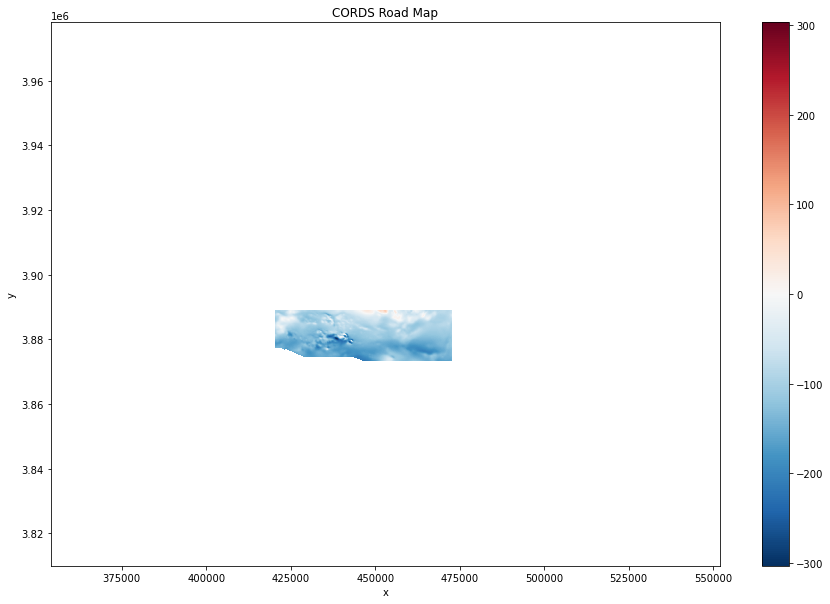

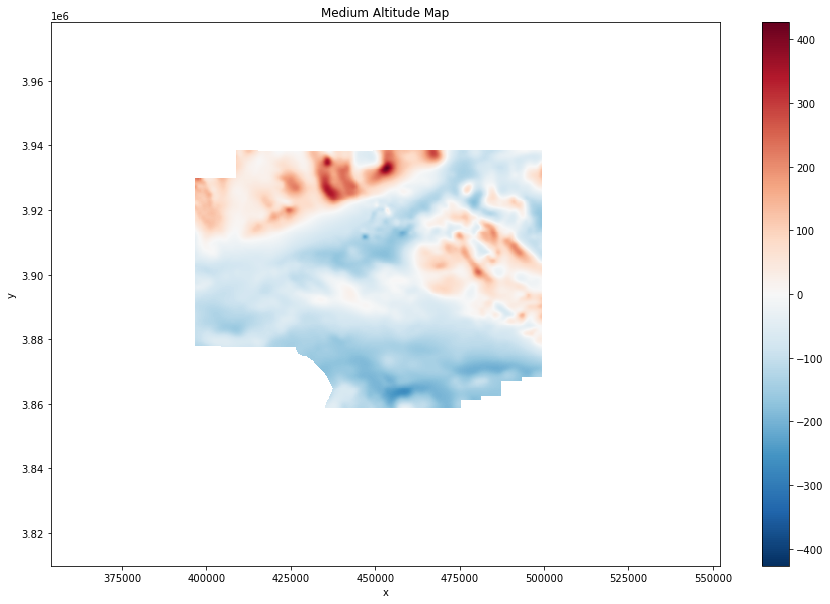

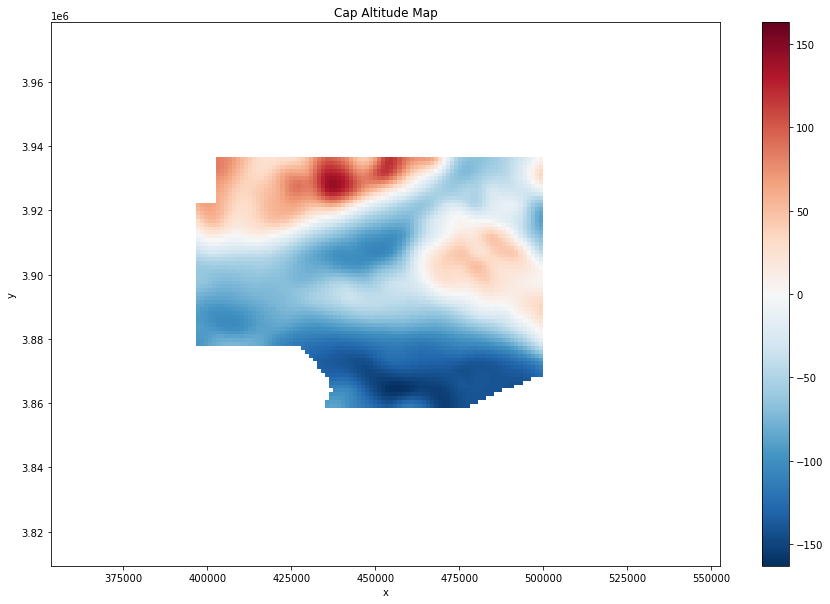

In [14]:
CORDS_FNAME  = join(TEST_DIR, 'CORDS-Road_MAG-asc.gxf')            # Cords Road: 300m MSL (map is level)
MEDIUM_FNAME = join(TEST_DIR, 'R2508-Medium-Altitude_MAG-asc.gxf') # Medium altitude: 7000m MSL (map is level)
CAP_FNAME    = join(TEST_DIR, 'R2508-Cap_MAG-asc.gxf')             # Cap altitude: 17000m MSL (map is level)

cords_map  = rxr.open_rasterio(CORDS_FNAME)
medium_map = rxr.open_rasterio(MEDIUM_FNAME)
cap_map    = rxr.open_rasterio(CAP_FNAME)

cords_map  = mu.num_to_nan(cords_map)
medium_map = mu.num_to_nan(medium_map)
cap_map    = mu.num_to_nan(cap_map)

cords_alt  = 300  # AGL (m)
medium_alt = 1400 # AGL (m)
cap_alt    = 4600 # AGL (m)

plt.figure()
cords_map.plot()
plt.title('CORDS Road Map')

plt.figure()
medium_map.plot()
plt.title('Medium Altitude Map')

plt.figure()
cap_map.plot()
plt.title('Cap Altitude Map')

# Find Spacial Frequency Content of Maps Before and After Low Pass Filtering (LPF)
LPF cutoff frequency is determined by map altitude. Since a map is generally considered to be fully sampled when the distance between samples is approximately equal to the map altitude, the shortest spacial wavelengths expected in the map is twice the map altitude. The inverse of this wavelength is then set as the LPF cutoff frequency.

## CORDS Road Map Frequency Content

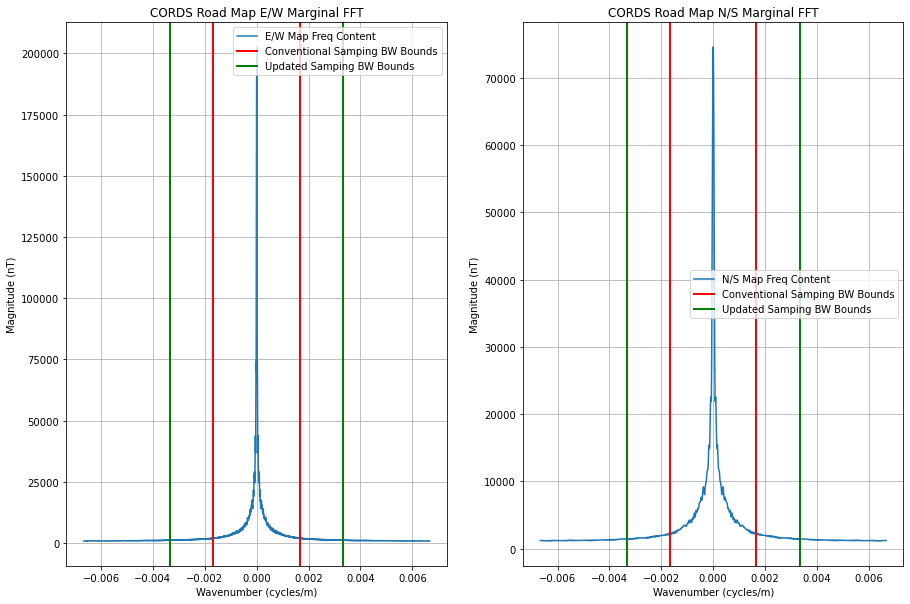

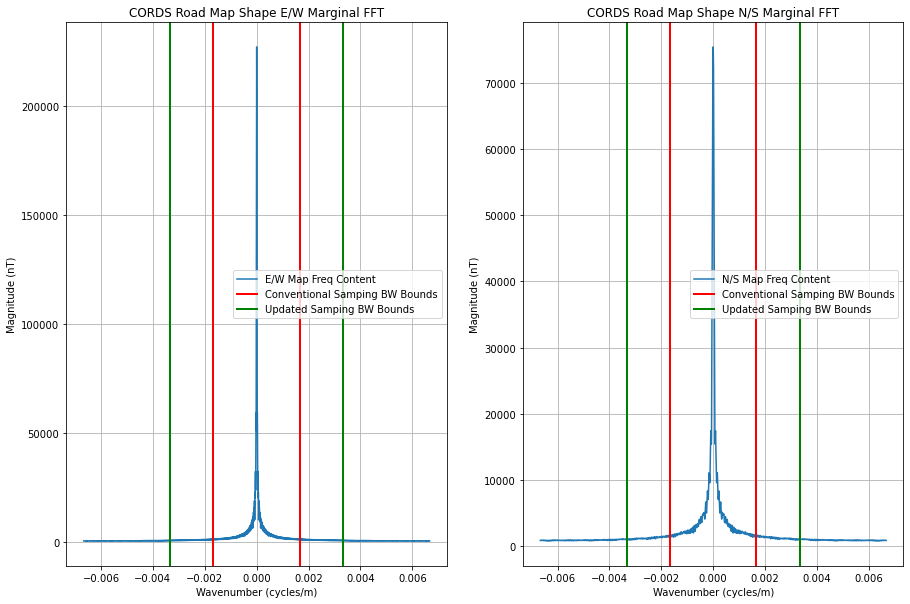

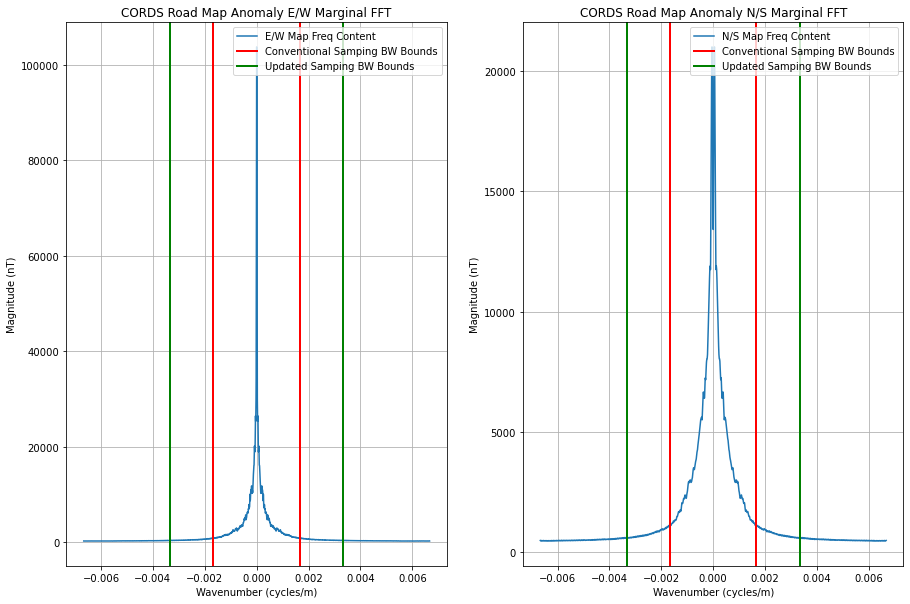

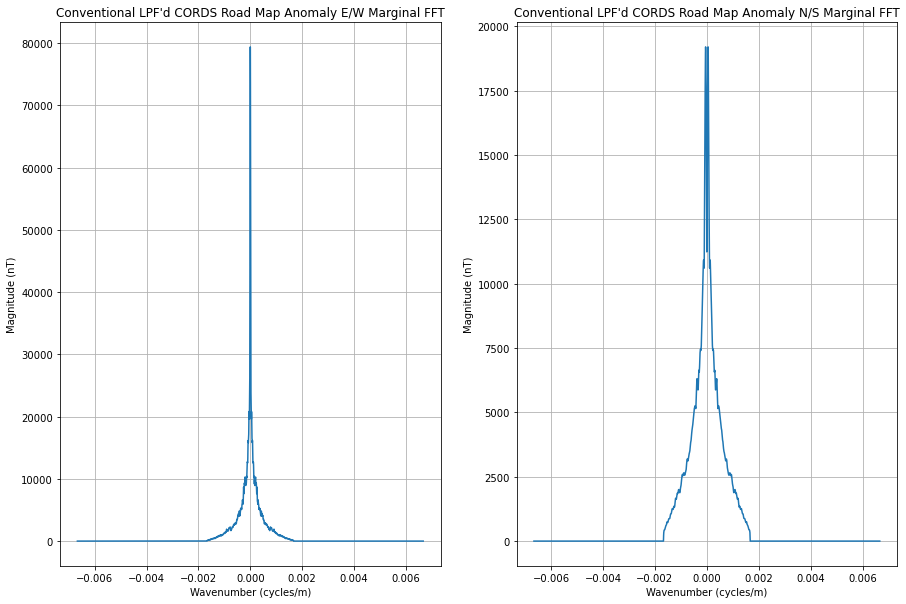

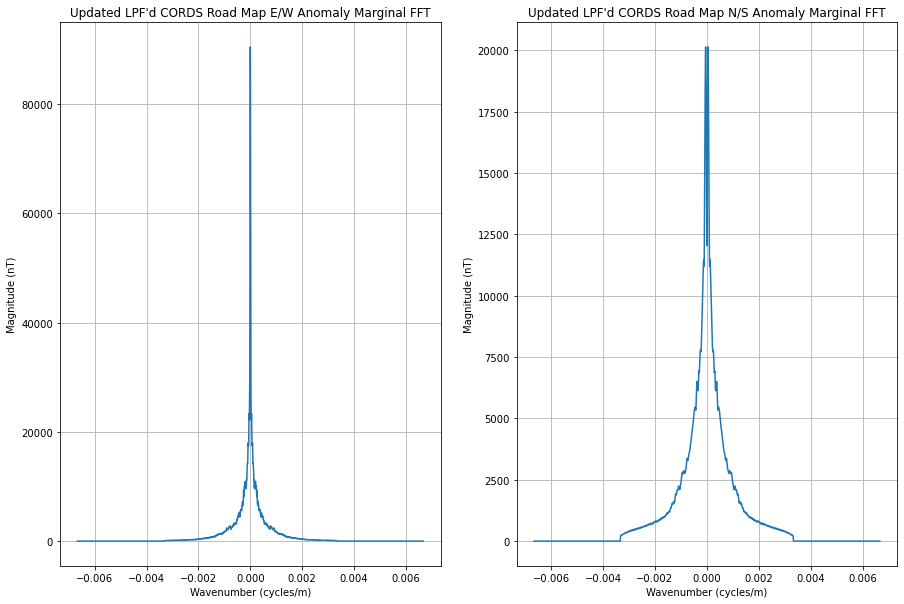

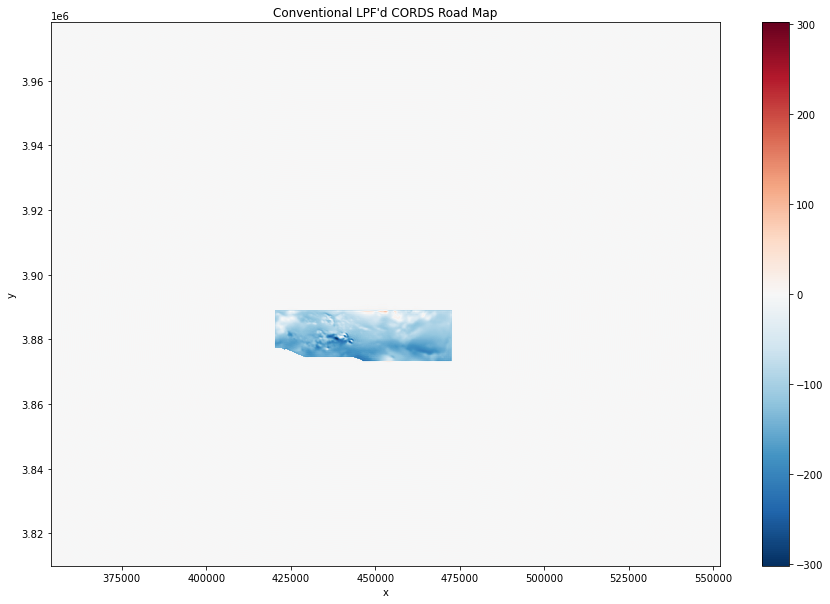

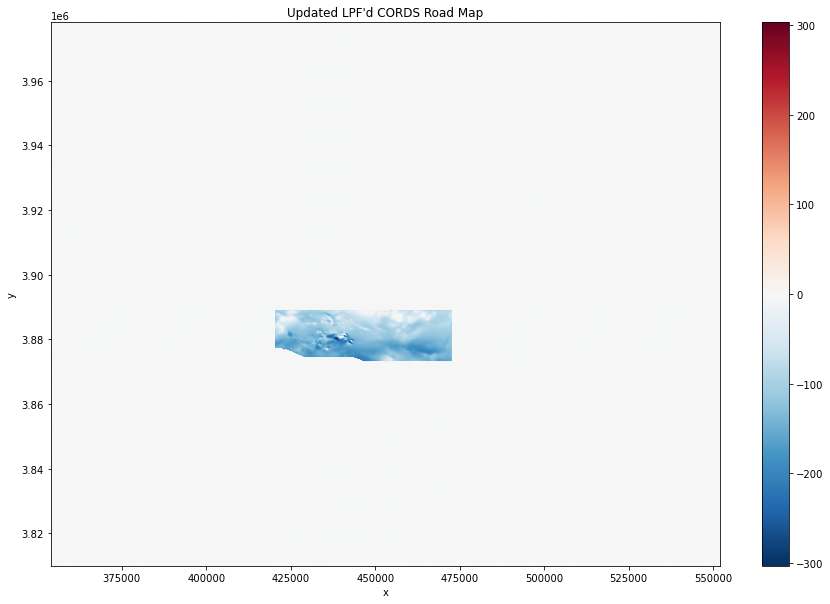

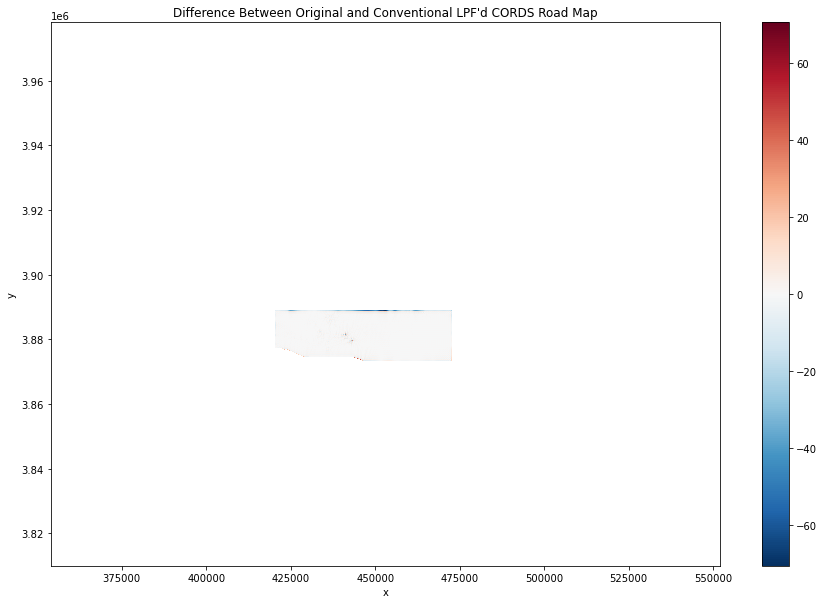

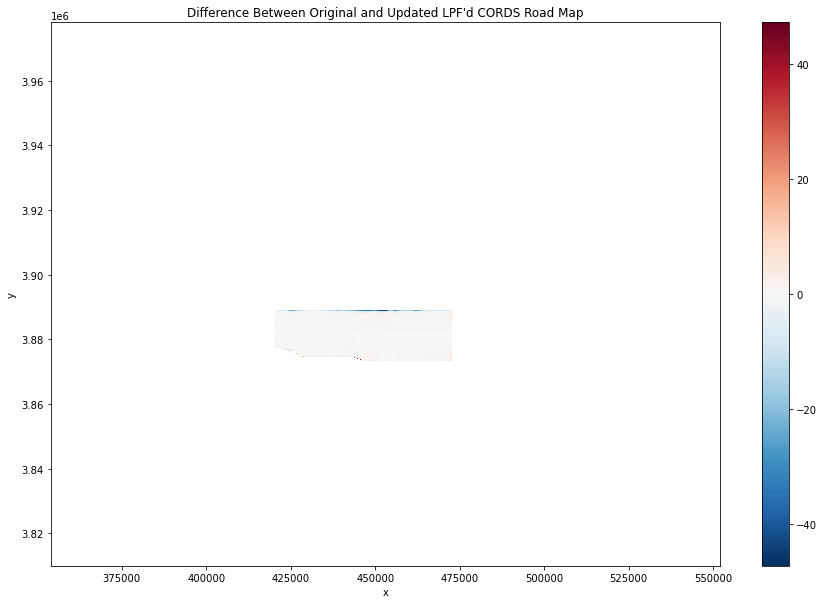

Conventional LPF'd CORDS Road Map RMSE: 3.1703691482543945
Updated LPF'd CORDS Road Map RMSE: 1.9717313051223755


In [15]:
freq_analysis(cords_map, 'CORDS Road', cords_alt)

## Medium Altitude Map Frequency Content

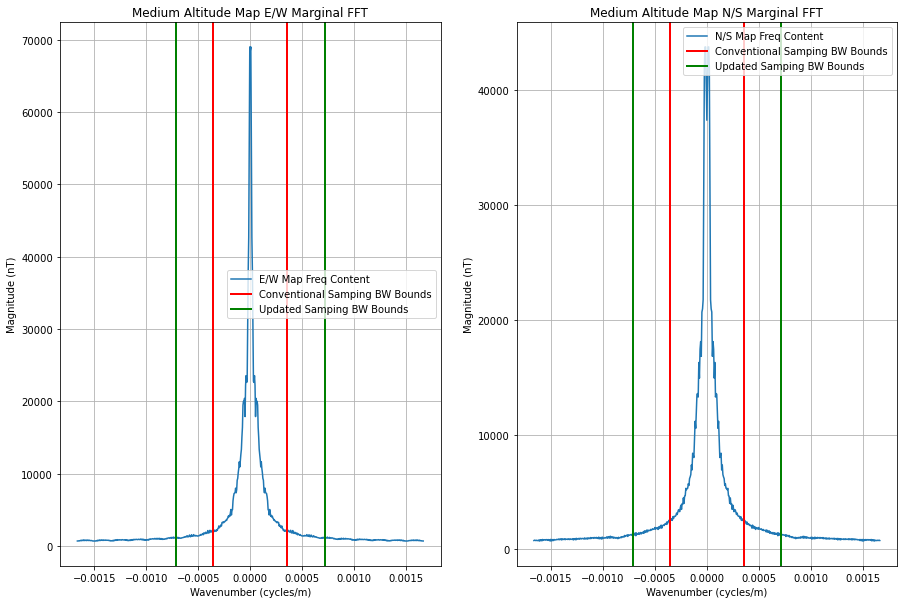

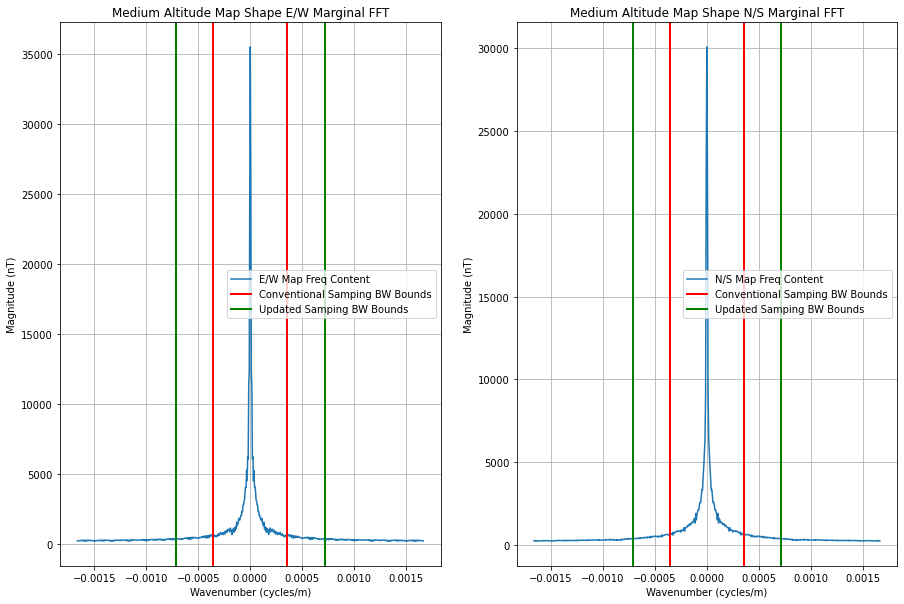

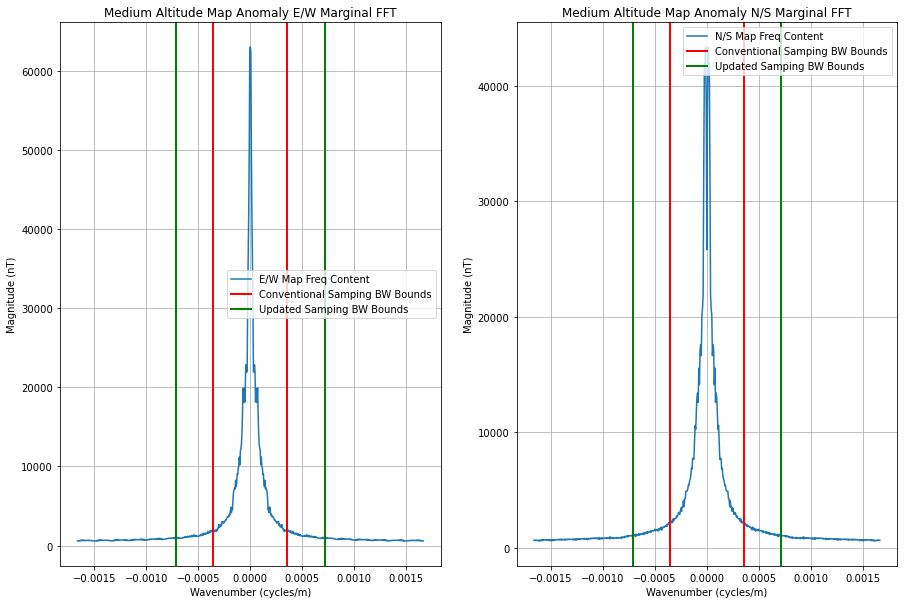

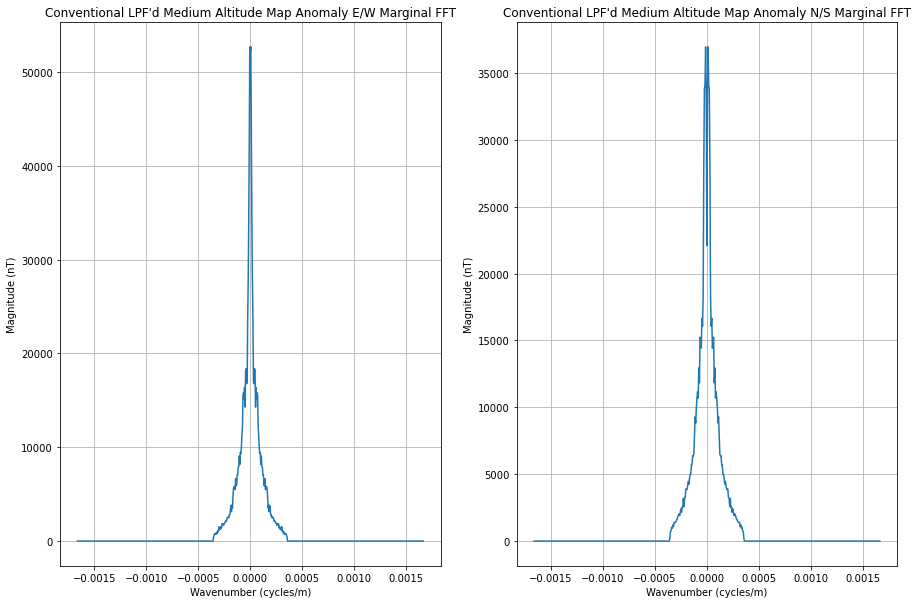

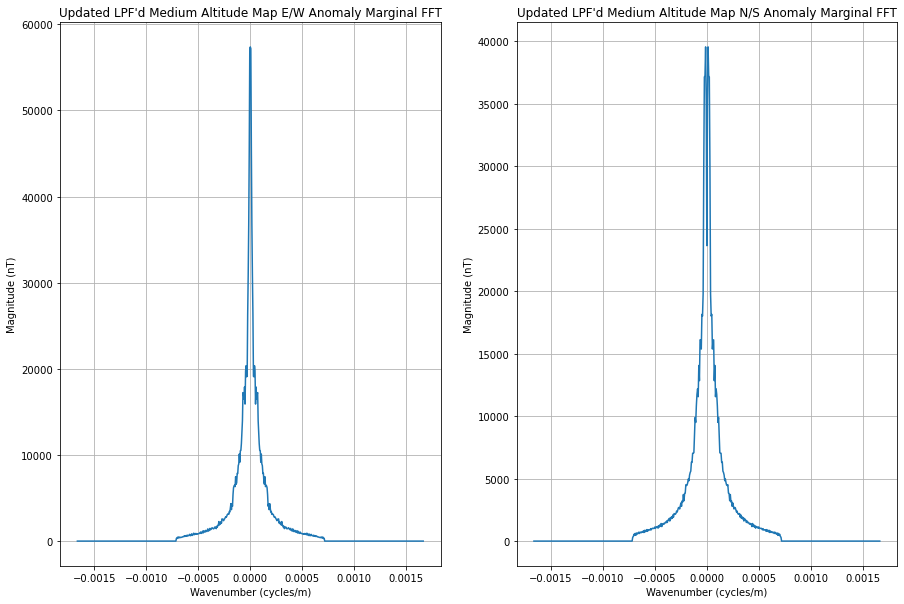

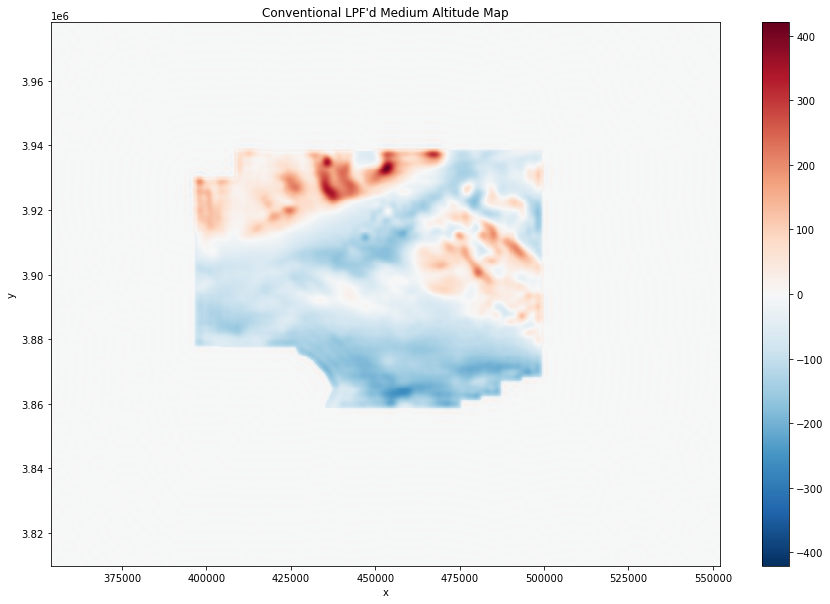

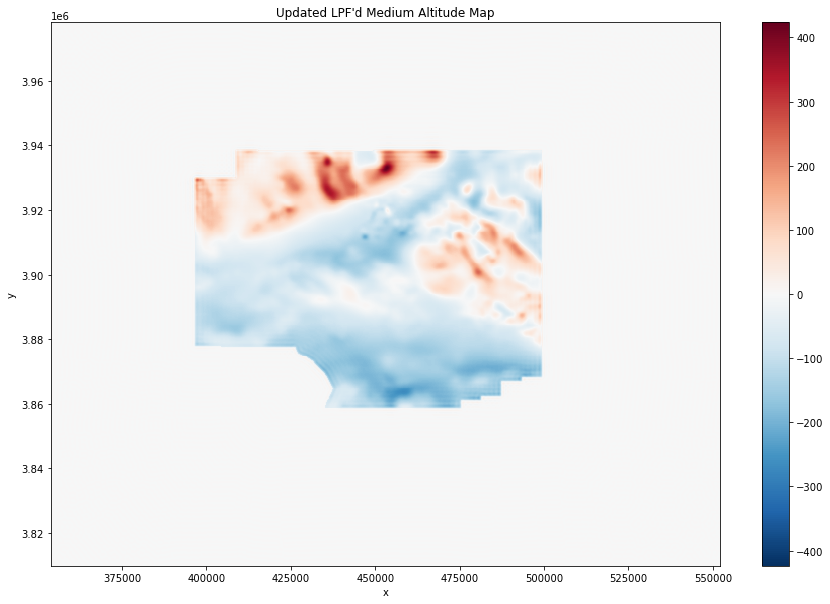

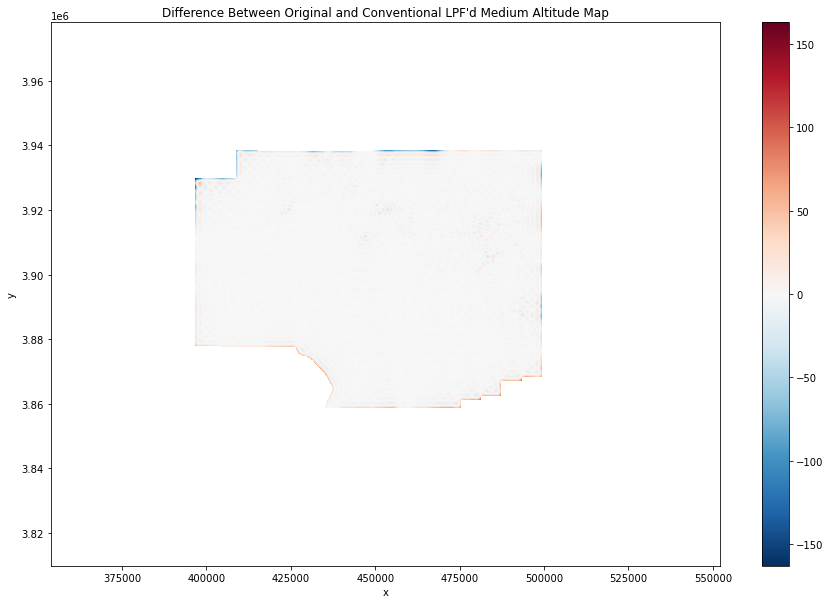

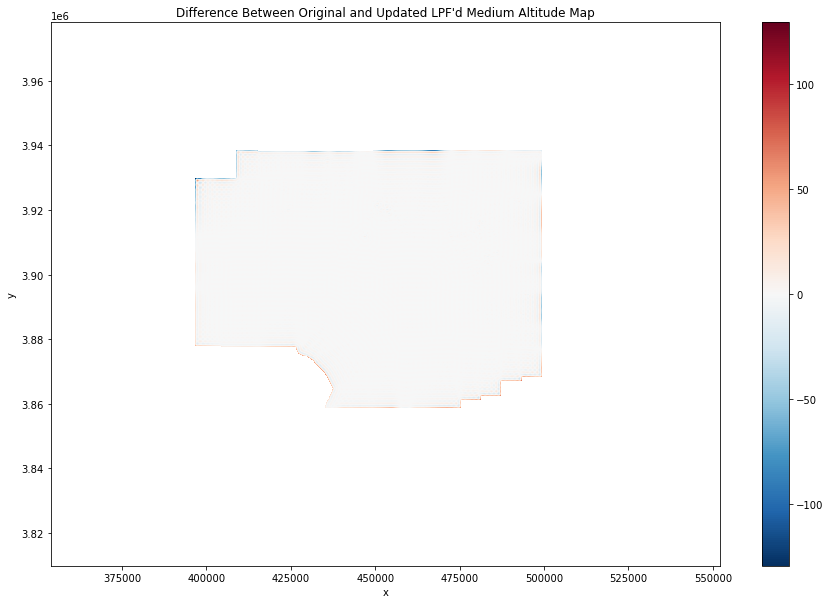

Conventional LPF'd Medium Altitude Map RMSE: 6.454060077667236
Updated LPF'd Medium Altitude Map RMSE: 4.033625602722168


In [16]:
freq_analysis(medium_map, 'Medium Altitude', medium_alt)

## Cap Altitude Map Frequency Content

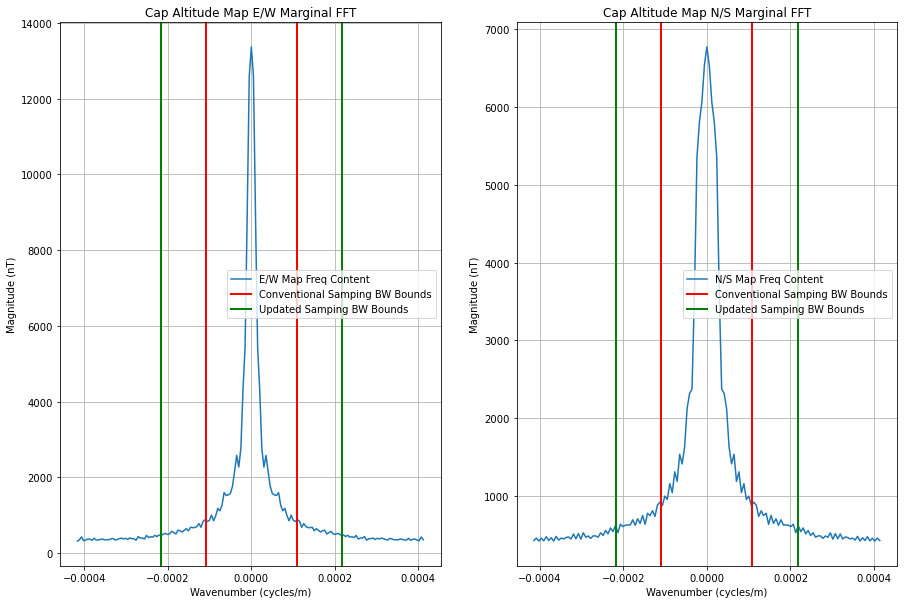

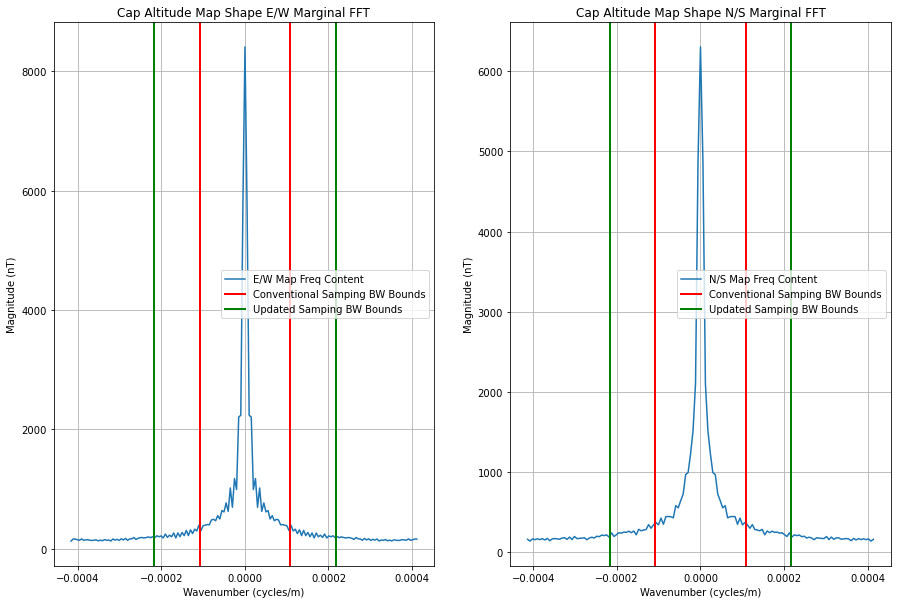

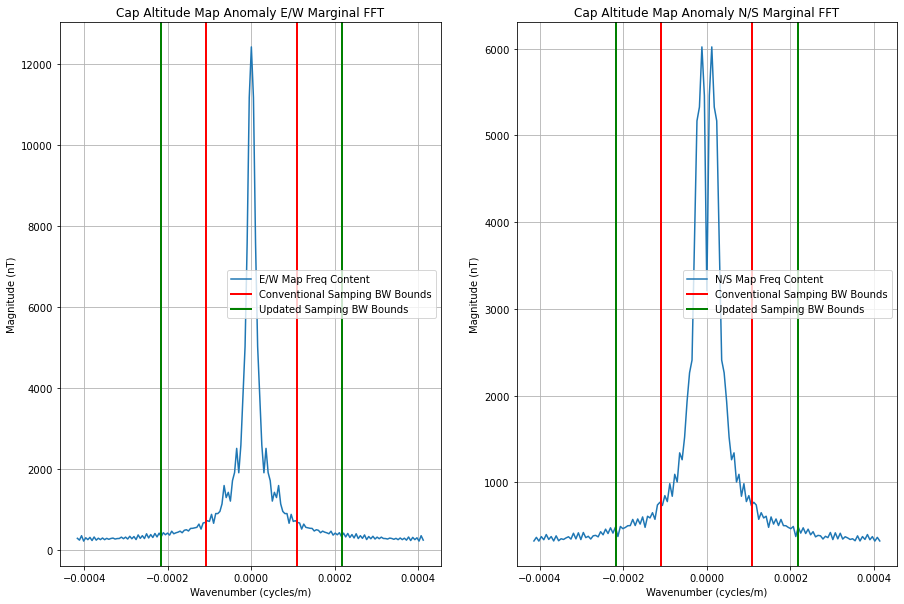

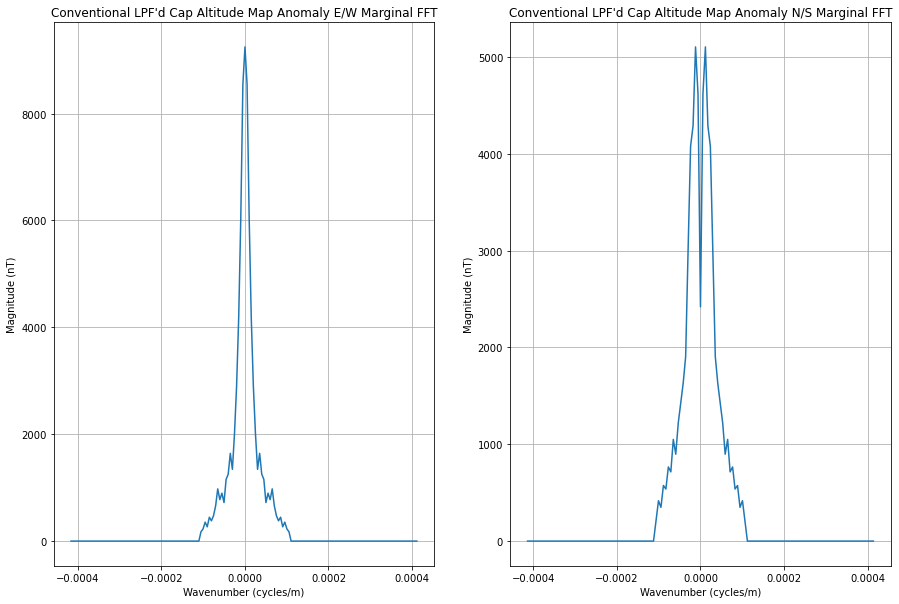

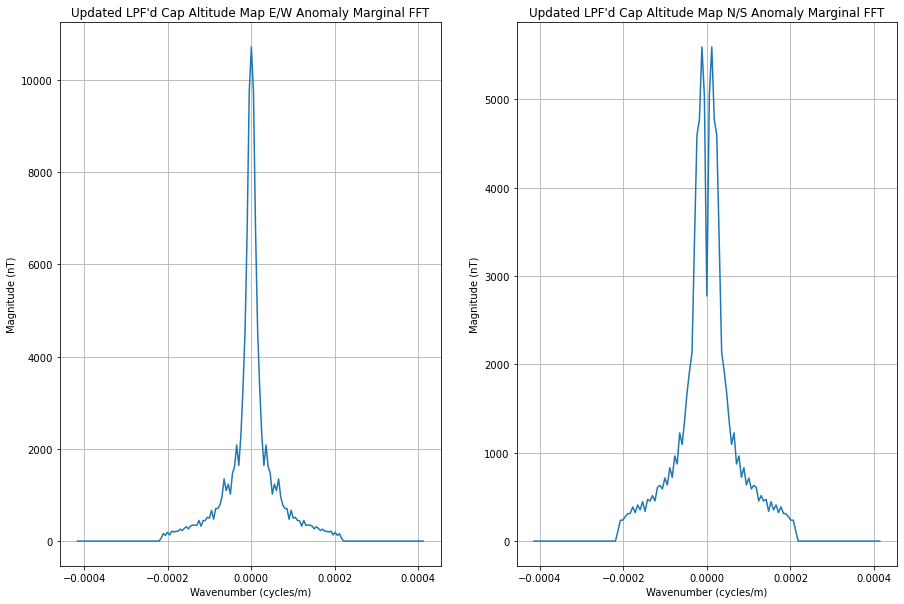

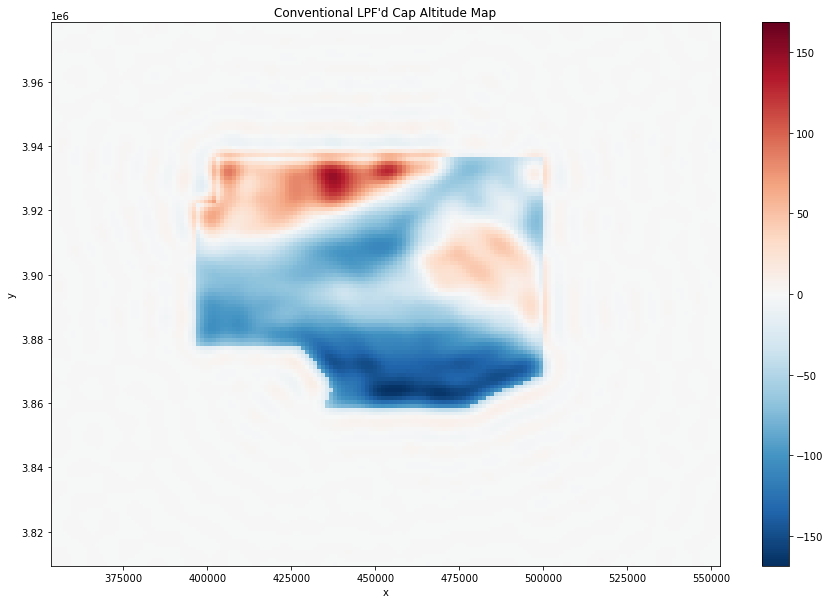

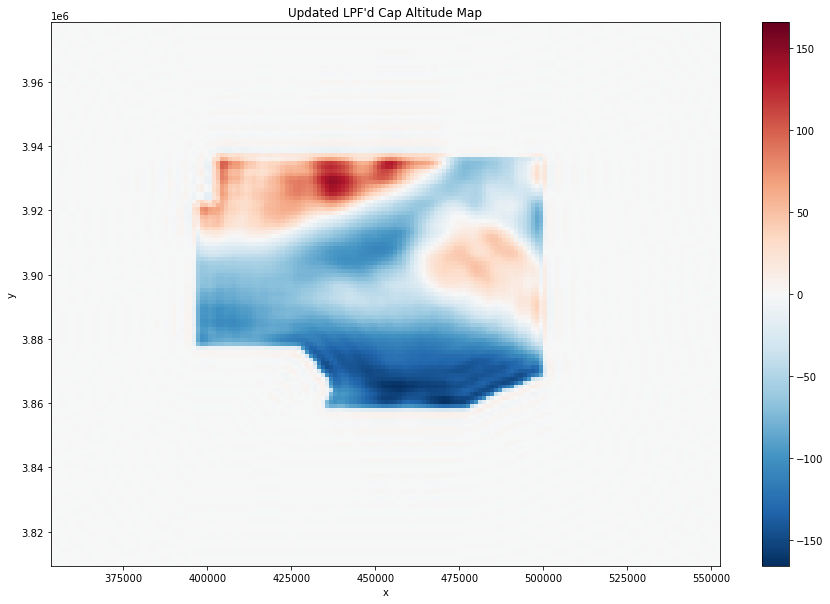

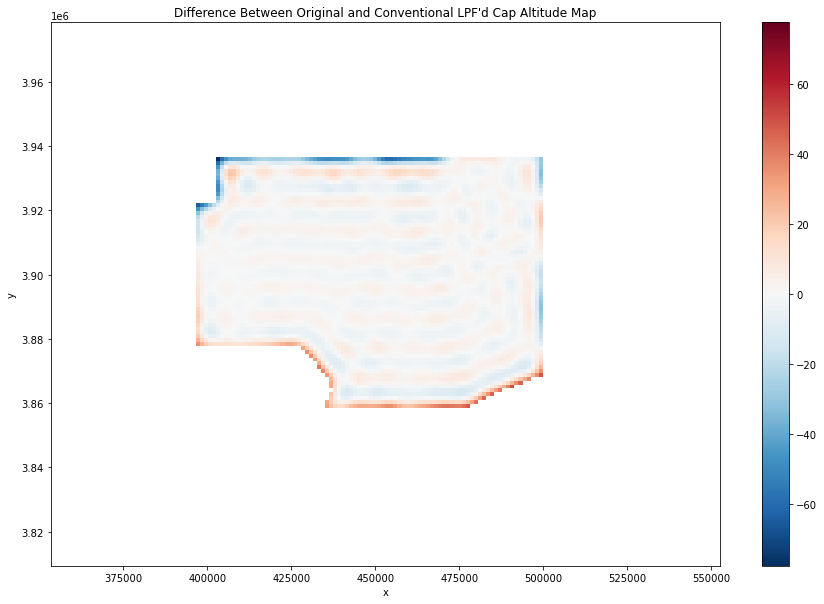

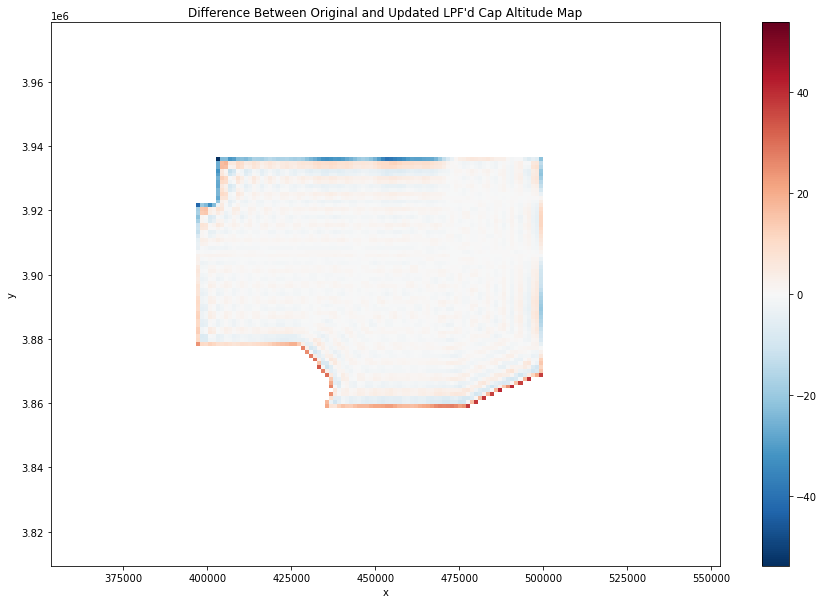

Conventional LPF'd Cap Altitude Map RMSE: 8.285772323608398
Updated LPF'd Cap Altitude Map RMSE: 5.249083995819092


In [17]:
freq_analysis(cap_map, 'Cap Altitude', cap_alt)

# Medium and Cap Altitude Comparison

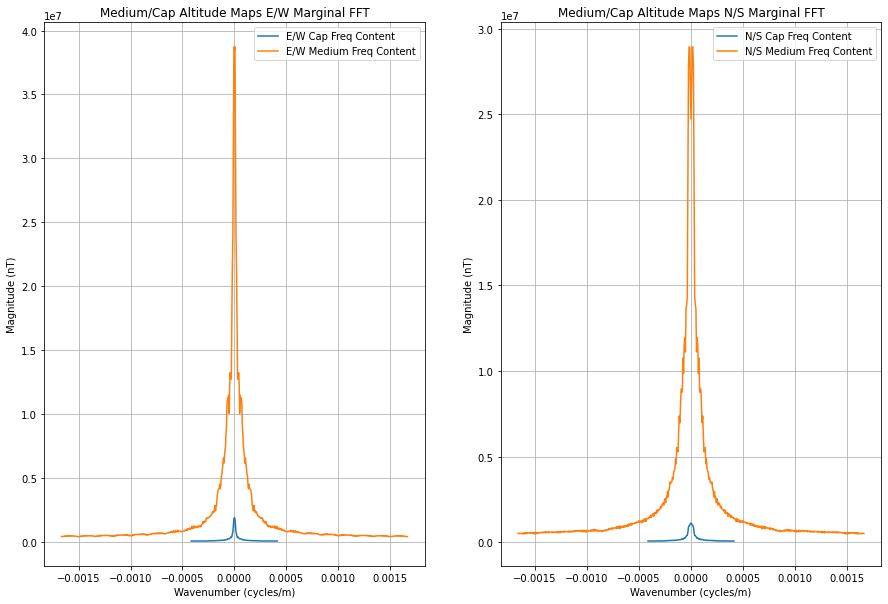

In [18]:
medium_fft = fft.fft2(np.nan_to_num(np.squeeze(medium_map.data)))

medium_kx = fft.fftfreq(n=len(medium_map.x), d=np.diff(medium_map.x).mean()) # Cycles/m
medium_ky = fft.fftfreq(n=len(medium_map.y), d=np.diff(medium_map.y).mean()) # Cycles/m

cap_fft = fft.fft2(np.nan_to_num(np.squeeze(cap_map.data)))

cap_kx = fft.fftfreq(n=len(cap_map.x), d=np.diff(cap_map.x).mean()) # Cycles/m
cap_ky = fft.fftfreq(n=len(cap_map.y), d=np.diff(cap_map.y).mean()) # Cycles/m

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Medium/Cap Altitude Maps E/W Marginal FFT')
ax1.set_xlabel('Wavenumber (cycles/m)')
ax1.set_ylabel('Magnitude (nT)')
ax1.plot(fft.fftshift(cap_kx), np.sum(abs(fft.fftshift(cap_fft)), axis=0), label='E/W Cap Freq Content')
ax1.plot(fft.fftshift(medium_kx), np.sum(abs(fft.fftshift(medium_fft)), axis=0), label='E/W Medium Freq Content')
ax1.legend()
ax1.grid()

ax2.set_title('Medium/Cap Altitude Maps N/S Marginal FFT')
ax2.set_xlabel('Wavenumber (cycles/m)')
ax2.set_ylabel('Magnitude (nT)')
ax2.plot(fft.fftshift(cap_ky), np.sum(abs(fft.fftshift(cap_fft)), axis=1), label='N/S Cap Freq Content')
ax2.plot(fft.fftshift(medium_ky), np.sum(abs(fft.fftshift(medium_fft)), axis=1), label='N/S Medium Freq Content')
ax2.legend()
ax2.grid()